In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

In [2]:
def prepare_images(file_paths, target_size=(64, 64)):
    images = []
    for path in file_paths:
        img = load_img(path, target_size=target_size)
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

In [3]:
test_folder_path = './dataset/test_img/Healthy_fishies/'

def testing_the_model(model):
    predictions_data = []

    for subdir, dirs, files in os.walk(test_folder_path):
        if subdir == test_folder_path:
            continue

        true_labels = []
        predicted_labels = []

        for file in files:
            img_path = os.path.join(subdir, file)
            test_image = prepare_images([img_path])

            prediction = model.predict(test_image, verbose=0)

            true_class = os.path.basename(subdir)

            predicted_class_index = np.argmax(prediction[0])
            class_labels = ["Diseased", "Healthy"]
            predicted_class_label = class_labels[predicted_class_index]

            true_labels.append('Healthy')
            predicted_labels.append(predicted_class_label)

        accuracy = np.mean(np.array(true_labels) == np.array(predicted_labels))

        # Samla data för förutsägelser
        predictions_data.append({
            "True Class": true_class,
            "Predicted Class": predicted_labels,
            "Accuracy": accuracy
        })

    return predictions_data

In [4]:
def plot_predictions(predictions_data):
    num_classes = len(predictions_data)
    labels = ["Diseased", "Healthy"]
    num_columns = 4  # Antal diagram per rad
    num_rows = -(-num_classes // num_columns)  # Beräkning av antal rader

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 4))  # Justera figurens storlek

    for i, prediction in enumerate(predictions_data):
        true_class = prediction["True Class"]
        predicted_labels = prediction["Predicted Class"]

        values = [predicted_labels.count(label) for label in labels]

        row_index = i // num_columns
        col_index = i % num_columns
        if num_rows == 1:  # Om det bara finns en rad
            ax = axes[col_index]
        else:
            ax = axes[row_index, col_index]

        ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        ax.set_title(f'Predictions for {true_class}')

    plt.tight_layout()
    plt.show()


In [25]:
df = pd.read_csv("./dataset/cropped_images/augmented_data.csv")

In [26]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['sickness'], random_state=42)

In [48]:
test_df

,Unnamed: 0,path,sickness,target
72,73,./dataset/cropped_images/cropped_Bacterial_Red...,bacterial_red disease,disease
321,329,./dataset/cropped_images/cropped_Viral_disease...,viral_diseases_white_tail_disease,disease
199,202,./dataset/cropped_images/cropped_Healthy_Fish_...,healthy_fish,healthy
286,294,./dataset/cropped_images/cropped_Parasitic_dis...,parasitic_diseases,disease
115,116,./dataset/cropped_images/cropped_Fungal_diseas...,fungal_diseases_saprolegniasis,disease
...,...,...,...,...
28,28,./dataset/cropped_images/cropped_Bacterial_dis...,bacterial_diseases _aeromoniasis,disease
270,278,./dataset/cropped_images/cropped_healthy_fish_...,healthy_fish,healthy
188,191,./dataset/cropped_images/cropped_Healthy_Fish_...,healthy_fish,healthy
74,75,./dataset/cropped_images/cropped_Bacterial_Red...,bacterial_red disease,disease


In [27]:
X_test = prepare_images(test_df['path'])
y_test = test_df['target']

In [28]:
loaded_model = load_model('./saved_models/cnn_model_original_data_10-1-24.h5')

In [29]:
def plot_matrix_for_original_data(loaded_model): 
    y_pred_categorical = loaded_model.predict(X_test)
    y_pred = np.argmax(y_pred_categorical, axis=1)

    y_test_labels = np.array(["Healthy" if label == 'healthy' else "Diseased" for label in y_test])
    y_pred_labels = np.array(["Healthy" if label == 1 else "Diseased" for label in y_pred])

    class_labels = np.unique(y_test_labels)

    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    print(f"Accuracy: {accuracy}")

    print(classification_report(y_test_labels, y_pred_labels))

    cm = confusion_matrix(y_test_labels, y_pred_labels, labels=class_labels)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot()
    plt.show()


3/3 [==============================] - 0s 3ms/step
Accuracy: 0.7
              precision    recall  f1-score   support

    Diseased       0.70      0.88      0.78        43
     Healthy       0.69      0.41      0.51        27

    accuracy                           0.70        70
   macro avg       0.70      0.65      0.65        70
weighted avg       0.70      0.70      0.68        70



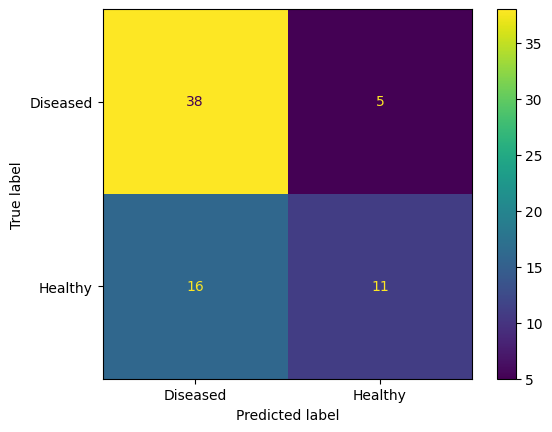

In [30]:
plot_matrix_for_original_data(loaded_model)

In [31]:
predictions_data = testing_the_model(loaded_model)

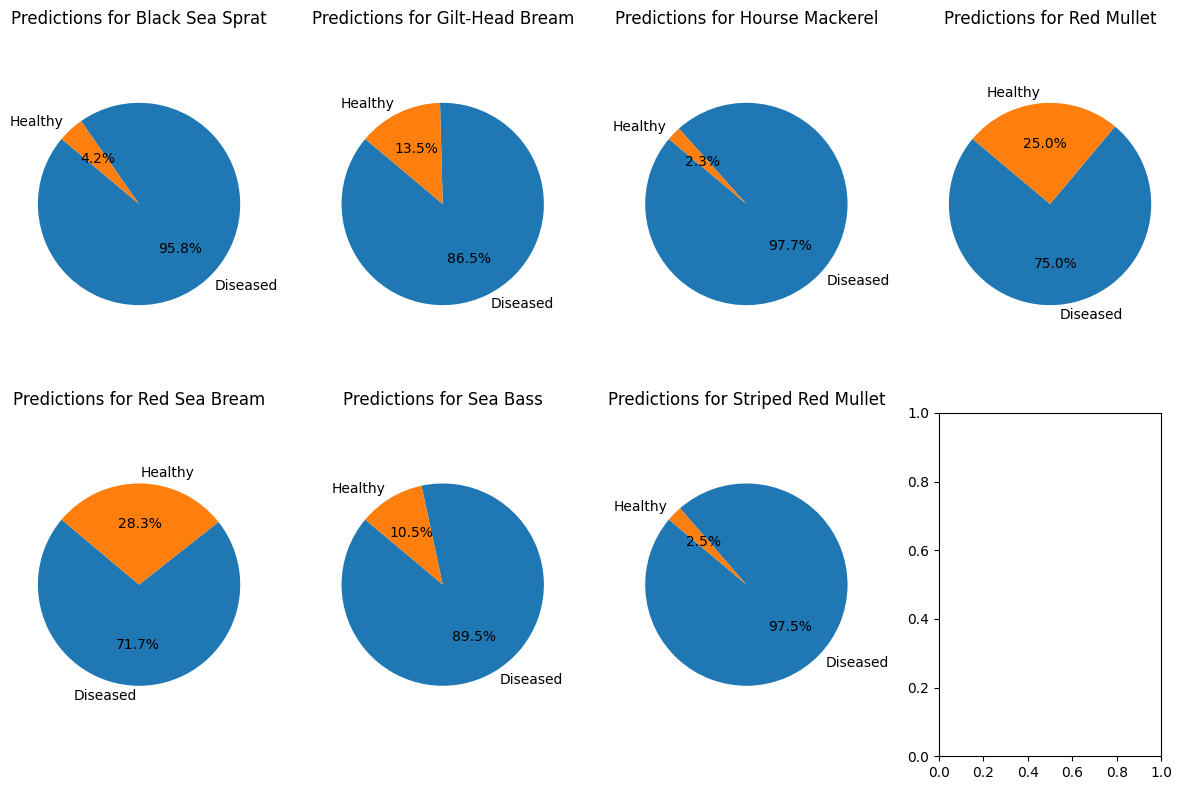

In [32]:
plot_predictions(predictions_data)

In [39]:
loaded_model = load_model('./saved_models/cnn_model_more_data_10-1-24.h5')

3/3 [==============================] - 0s 4ms/step
Accuracy: 0.6285714285714286
              precision    recall  f1-score   support

    Diseased       0.67      0.79      0.72        43
     Healthy       0.53      0.37      0.43        27

    accuracy                           0.63        70
   macro avg       0.60      0.58      0.58        70
weighted avg       0.61      0.63      0.61        70



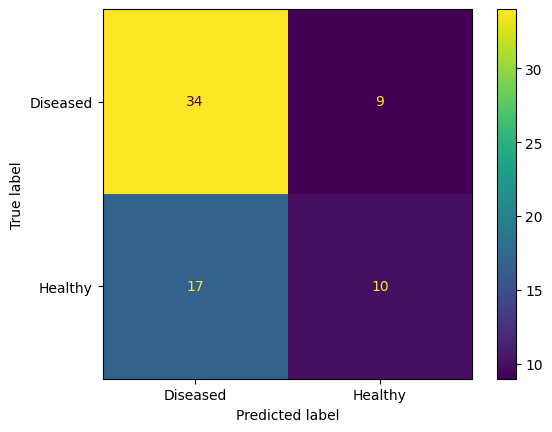

In [40]:
plot_matrix_for_original_data(loaded_model)

In [15]:
predictions_data = testing_the_model(loaded_model)

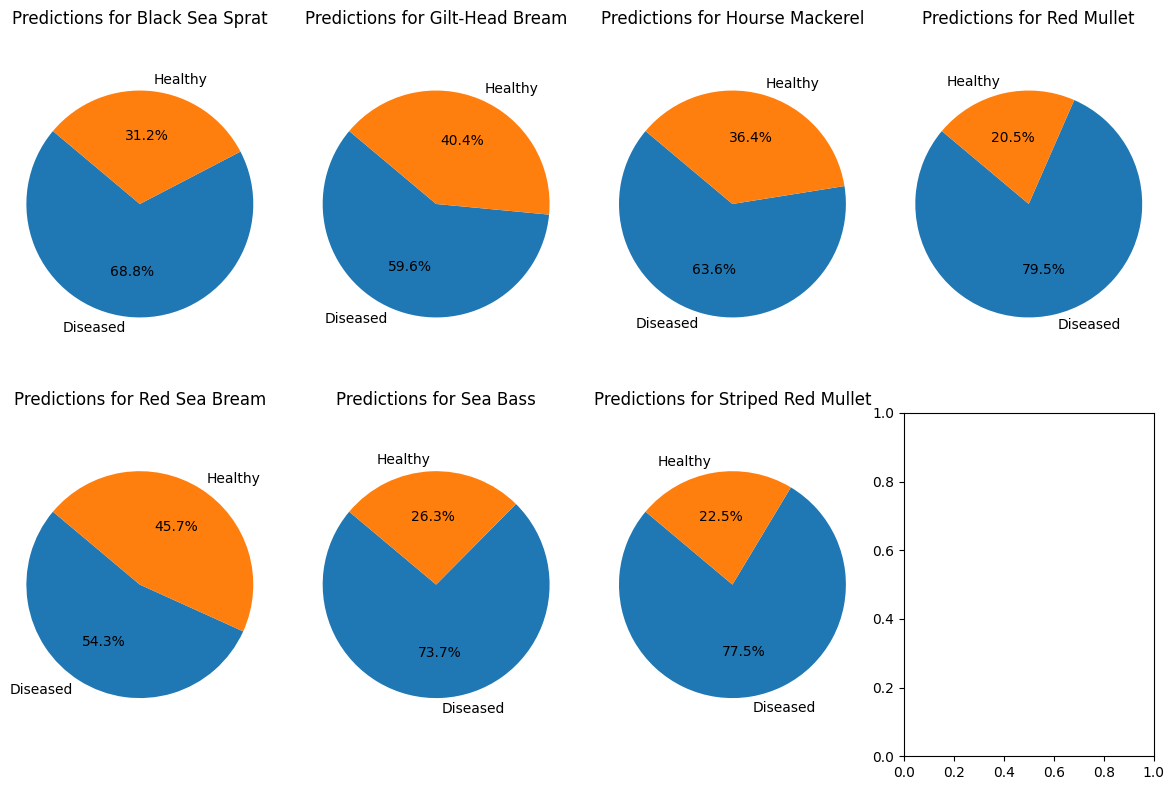

In [16]:
plot_predictions(predictions_data)

In [37]:
loaded_model = load_model('./saved_models/cnn_model_more_data_17-1-24.h5')

3/3 [==============================] - 0s 4ms/step
Accuracy: 0.6285714285714286
              precision    recall  f1-score   support

    Diseased       0.64      0.88      0.75        43
     Healthy       0.55      0.22      0.32        27

    accuracy                           0.63        70
   macro avg       0.59      0.55      0.53        70
weighted avg       0.61      0.63      0.58        70



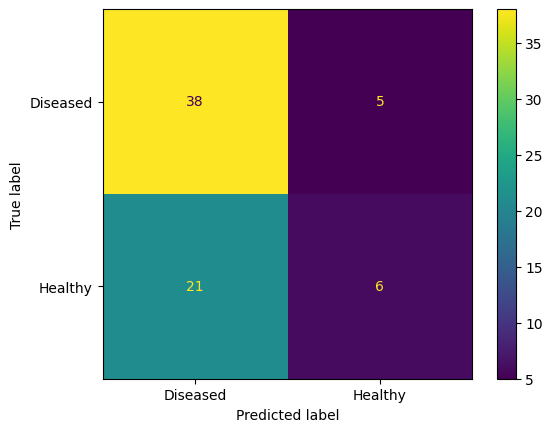

In [38]:
plot_matrix_for_original_data(loaded_model)

In [19]:
predictions_data = testing_the_model(loaded_model)

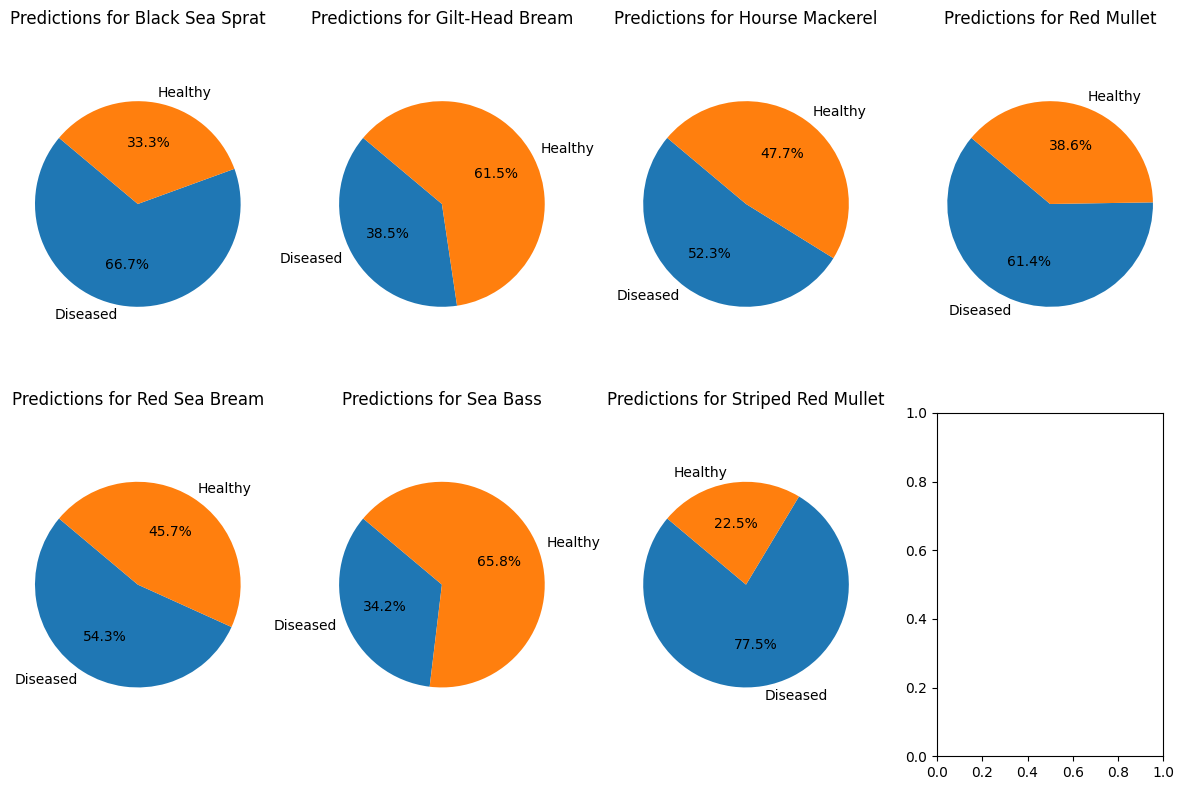

In [20]:
plot_predictions(predictions_data)

In [75]:
loaded_model = load_model('./saved_models/cnn_model_cropped_more_healthy_30-1-24.h5')

In [78]:
plot_matrix_for_original_data(loaded_model)

TypeError: plot_matrix_for_original_data() missing 3 required positional arguments: 'X_test_paths', 'y_test', and 'class_labels'

In [35]:
predictions_data = testing_the_model(loaded_model)

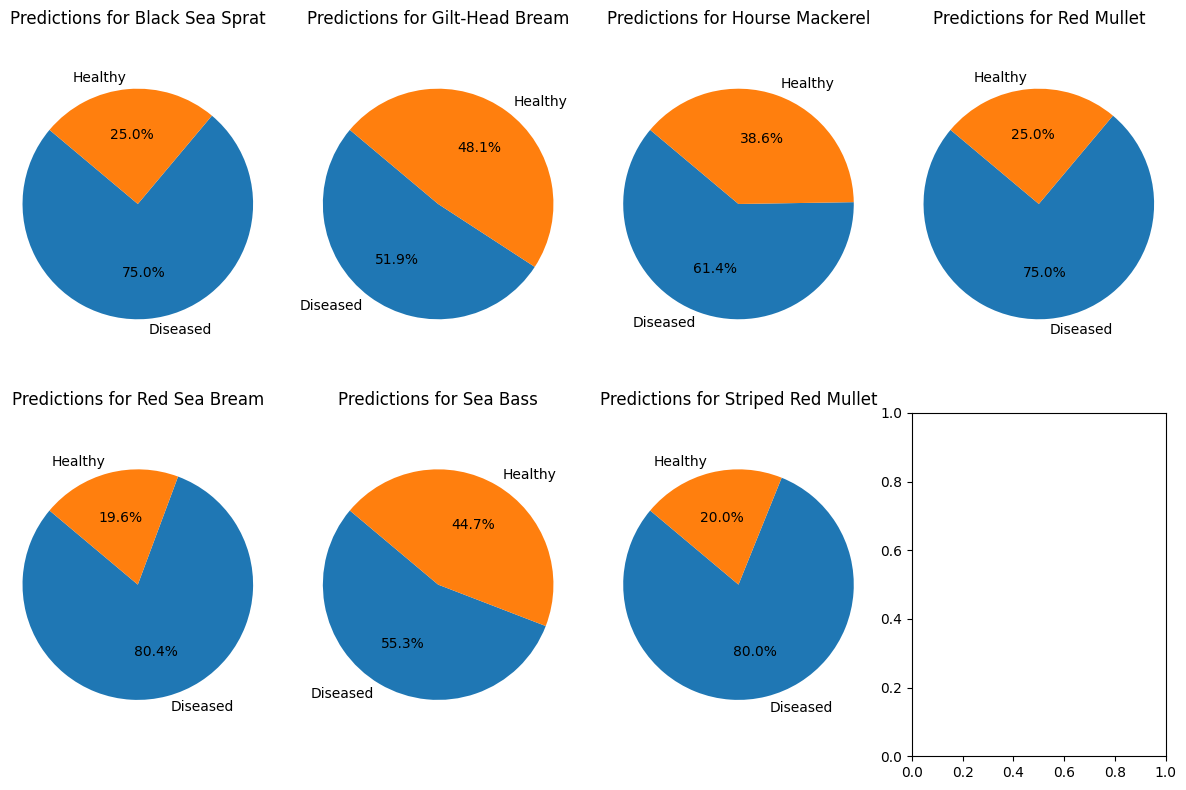

In [36]:
plot_predictions(predictions_data)